0.9
0.92


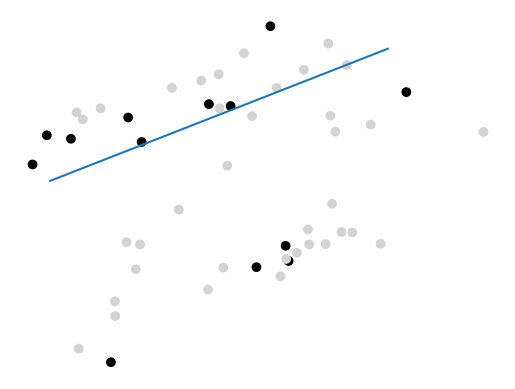

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split

classes = 4
X,t= make_classification(100, 5, n_classes = classes, random_state= 40, n_informative = 2, n_clusters_per_class = 1)
#%%
X_train, X_test, y_train, y_test= train_test_split(X, t , test_size=0.50)
#%%
model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
#%%
model.fit(X_train, y_train)
#%%
y=model.predict(X_test)
y2=model.predict(X_train)
#%%
from sklearn.metrics import accuracy_score
score =accuracy_score(y, y_test)
print(score)
score2 =accuracy_score(y2, y_train)
print(score2)
#%%
import matplotlib.pyplot as plt
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_train[:,0], X_train[:,1], c=color)

# Create the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();


In [7]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load a sample dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can change the kernel type as needed (e.g., 'linear', 'rbf', 'poly')

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 1.0


In [8]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': [0.1, 1, 'scale', 'auto'],  # Kernel coefficient (only for 'rbf' and 'poly' kernels)
}

# Create an SVM classifier
svm_classifier = SVC()

# Perform a grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

# Train the best model on the entire training dataset
best_svm_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Best Model Accuracy: {accuracy}")


Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Model Accuracy: 1.0


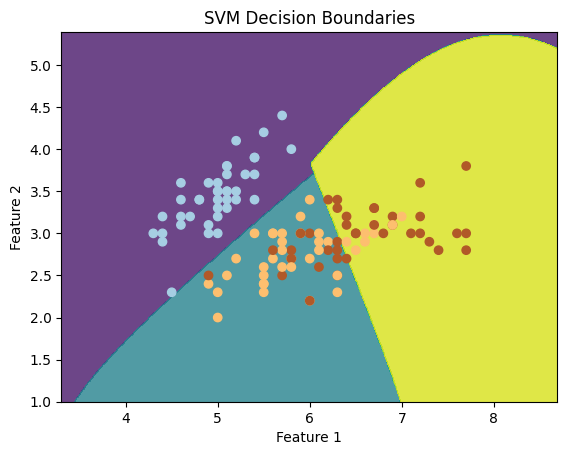

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Choose two features for visualization (e.g., the first two)
X_visualization = X_train[:, :2]

# Fit the SVM classifier on the selected features
svm_classifier.fit(X_visualization, y_train)

# Create a meshgrid for plotting
x_min, x_max = X_visualization[:, 0].min() - 1, X_visualization[:, 0].max() + 1
y_min, y_max = X_visualization[:, 1].min() - 1, X_visualization[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Plot decision boundaries
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_visualization[:, 0], X_visualization[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundaries')
plt.show()
